In [2]:
##special days for KLM and BA

# opens dataset
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy import stats
sns.set()
conn = sqlite3.connect('ALL_DATA_32_FEATURES.db')
#created_df = pd.read_sql("SELECT * FROM conversations", conn)

In [5]:
tweets_df = pd.read_sql("SELECT created_at, text, [('user', 'id_str')] FROM tweets", conn)

In [6]:
import datetime 

tweets_df['date'] = [datetime.datetime.strptime(tweet, "%a %b %d %H:%M:%S +0000 %Y").strftime("%Y-%m-%d") for tweet in tweets_df['created_at']]
                          

In [7]:
#make list with all holidays as datetime objects

#make list with all holidays as date string %Y-%m-%d
holidays = ['2016-1-1', '2016-2-14', '2016-3-25', '2016-3-27','2016-3-28', '2016-4-27', '2016-5-4', '2016-5-5', 
            '2016-5-15', '2016-5-16', '2016-6-21', '2016-7-22', '2016-12-5', '2016-12-6', '2016-12-21', 
            '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-31', '2016-7-5', '2016-7-4', '2016-10-31', 
            '2016-11-24', '2016-11-25', '2016-11-28', '2016-3-17', '2016-1-18']

#boolean mask where you check wehter ['date'] is in the list. make 2 dateframes, one with isin one with ~isin
in_holidays = tweets_df["date"].isin(holidays)
no_holidays = ~tweets_df["date"].isin(holidays)

df_in = tweets_df[in_holidays]
df_out = tweets_df

In [8]:
# gets the incoming tweets for both airlines

KLM_incoming_in = []
KLM_incoming_out = []
BA_incoming_in = []
BA_incoming_out = []

for i, item in df_in[['text', 'date']].iterrows():
    if '@KLM' in item['text']:
        KLM_incoming_in.append(item['date'])
    elif '@British_Airways' in item['text']:
        BA_incoming_in.append(item['date'])
        
for i, item in df_out[['text', 'date']].iterrows():
    if '@KLM' in item['text']:
        KLM_incoming_out.append(item['date'])
    elif '@British_Airways' in item['text']:
        BA_incoming_out.append(item['date'])
        
KLM_incoming_in = pd.Series(KLM_incoming_in)
KLM_incoming_out = pd.Series(KLM_incoming_out)
BA_incoming_out = pd.Series(BA_incoming_out)
BA_incoming_in = pd.Series(BA_incoming_in)

In [9]:
# gets the number of incoming tweets per day (indexed by day of year) for both airlines

KLM_incoming_sorted = KLM_incoming_in.value_counts().sort_index()
KLM_incoming_sorted_out = KLM_incoming_out.value_counts().sort_index()
BA_incoming_sorted = BA_incoming_in.value_counts().sort_index()
BA_incoming_sorted_out = BA_incoming_out.value_counts().sort_index()

In [10]:
#gets the outgoing tweets dataframe for boht airlines
KLM_outgoing_in = df_in[df_in["('user', 'id_str')"] == "56377143"] 
KLM_outgoing_out = df_out[df_out["('user', 'id_str')"] == "56377143"] 
BA_outgoing_in = df_in[df_in["('user', 'id_str')"] == "18332190"]
BA_outgoing_out = df_out[df_out["('user', 'id_str')"] == "18332190"]

In [11]:
KLM_outgoing_sorted = KLM_outgoing_in["date"].value_counts().sort_index()
KLM_outgoing_sorted_out = KLM_outgoing_out["date"].value_counts().sort_index()
BA_outgoing_sorted = BA_outgoing_in["date"].value_counts().sort_index()
BA_outgoing_sorted_out = BA_outgoing_out["date"].value_counts().sort_index()

In [12]:
KLM_mean_vac = (KLM_outgoing_sorted.mean())/(KLM_incoming_sorted.mean())*100
KLM_mean_nor = (KLM_outgoing_sorted_out.mean())/(KLM_incoming_sorted_out.mean())*100
BA_mean_vac = (BA_outgoing_sorted.mean())/(BA_incoming_sorted.mean())*100
BA_mean_nor = (BA_outgoing_sorted_out.mean())/(BA_incoming_sorted_out.mean())*100

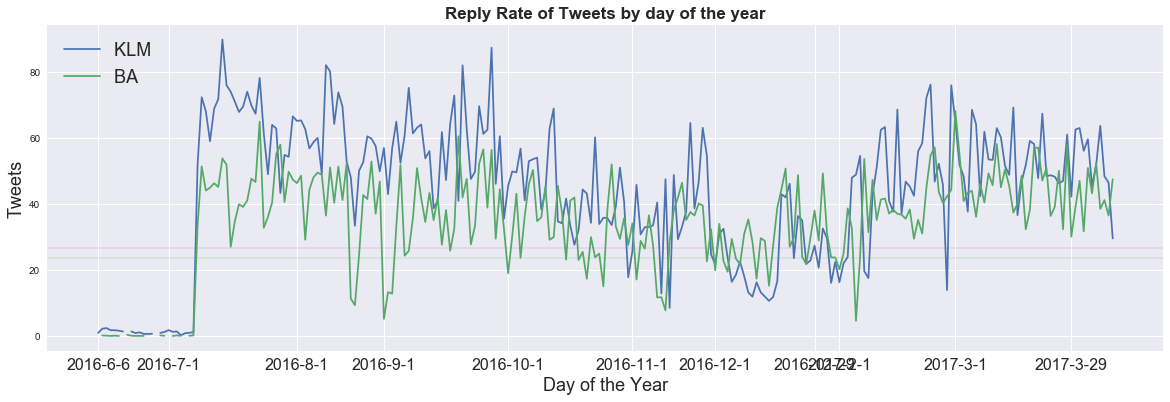

In [16]:
KLM_delta_vac = (KLM_outgoing_sorted).divide(KLM_incoming_sorted) 
KLM_delta_nor = (KLM_outgoing_sorted_out).divide(KLM_incoming_sorted_out) 
BA_delta_vac = BA_outgoing_sorted.divide(BA_incoming_sorted)
BA_delta_nor = BA_outgoing_sorted_out.divide(BA_incoming_sorted_out) 

plt.figure(figsize=(20,6));
plt.plot(range(246), KLM_delta_nor*100);
plt.plot(range(246), BA_delta_nor*100);
plt.title(f'Reply Rate of Tweets by day of the year', fontsize=17, weight='bold')
plt.legend(['KLM ', 'BA ', 'Mean KLM Vac', 'Mean BA Vac'], fontsize=18, loc=2)
plt.ylabel('Tweets', fontsize=18)
plt.xlabel('Day of the Year', fontsize=18)
#plt.xlim('2016-6-6', '2017-3-29')
plt.xticks([0, 17, 48, 69, 99, 129, 149, 173, 179, 207, 235],
           ['2016-6-6', '2016-7-1', '2016-8-1', '2016-9-1', '2016-10-1', 
            '2016-11-1', '2016-12-1', '2016-12-29', '2017-2-1', '2017-3-1', '2017-3-29'], fontsize=16);
#plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize=14);
#plt.axhspan(KLM_mean_nor-0.1, KLM_mean_nor+0.1, color='blue', alpha=0.5 )
#plt.axhspan(BA_mean_nor-0.1, BA_mean_nor+0.2, color='darkorange', alpha=0.5 )
plt.axhspan(KLM_mean_vac-0.1, KLM_mean_vac+0.1, color='green', alpha=0.5 )
plt.axhspan(BA_mean_vac-0.1, BA_mean_vac+0.1, color='purple', alpha=0.5 )
#plt.axvspan(120, 130, color='red', alpha=0.5)
plt.show()

(246,)
(246,)
2017-02-17


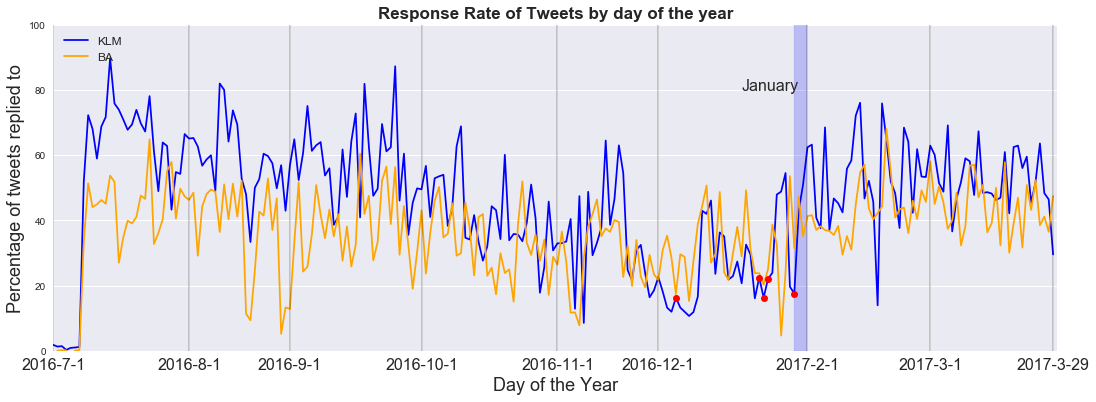

In [150]:
#KLM_delta_vac = (KLM_outgoing_sorted).divide(KLM_incoming_sorted)*100
KLM_delta_nor = (KLM_outgoing_sorted_out).divide(KLM_incoming_sorted_out)*100
#BA_delta_vac = BA_outgoing_sorted.divide(BA_incoming_sorted)
BA_delta_nor = BA_outgoing_sorted_out.divide(BA_incoming_sorted_out)*100 

print(KLM_delta_nor.shape)
print(BA_delta_nor.shape)
print(KLM_delta_nor.index.values[205])


plt.figure(figsize=(18,6));
KLM_delta_nor.plot(alpha=1, color='blue', label="KLM")
BA_delta_nor.plot(alpha=1, color='orange', label="BA")
#plt.plot(KLM_delta_nor, alpha=1, color='blue', label="KLM")
#plt.plot(range(246), KLM_delta_nor*100, alpha=1, color='blue', label="KLM")
#plt.plot(range(246), BA_delta_nor*100, alpha=1, color='orange', label="BA")

plt.title(f'Response Rate of Tweets by day of the year', fontsize=17, weight='bold')
plt.legend(fontsize=12, loc=2)
plt.ylabel('Percentage of tweets replied to', fontsize=18)
plt.xlabel('Day of the Year', fontsize=18)

plt.xlim([17,246])
plt.ylim([0,100])

#Christmas "2016-12-24,2016-12-25,2016-12-26"
#New Years "2016-12-31, 2017-01-01"
#sinterklaas "2017-12-05"
plt.plot(178, KLM_delta_nor["2016-12-24"], 'go', color='red')
plt.plot(179, KLM_delta_nor["2016-12-25"], 'go',color='red')
plt.plot(180, KLM_delta_nor["2016-12-26"], 'go',color='red')
plt.plot(159, KLM_delta_nor["2016-12-05"], 'go',color='red')
plt.plot(186, KLM_delta_nor["2017-01-29"], 'go',color='red')


positions =[17, 48, 71, 101, 132, 155, 189, 217, 245] 
plt.xticks(positions,
            ['2016-7-1', '2016-8-1', '2016-9-1', '2016-10-1', 
             '2016-11-1', '2016-12-1', '2017-2-1', '2017-3-1', '2017-3-29'], fontsize=16);
for x in positions:
    plt.axvline(x=x, linestyle="-", color="black", alpha=0.2)

plt.axvspan(186, 189, color='blue', alpha=0.2)
plt.text(x=174, y=80, s="January", size=16)
#plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize=14);
#plt.axhspan(KLM_mean_nor-0.1, KLM_mean_nor+0.1, color='blue', alpha=0.5 )
#plt.axhspan(BA_mean_nor-0.1, BA_mean_nor+0.2, color='darkorange', alpha=0.5 )
#plt.axvspan(173, 173.2, color='red', alpha=0.5)
#plt.xlim(("2016-07-01", "2016-07-01"))

plt.savefig("across_year.svg")
plt.show()



In [162]:
import numpy as np
import statsmodels.api as sm

[nan,
 0.2134927412467976,
 0.14443909484833894,
 0.075414781297134248,
 0.14785608674223755,
 0.060679611650485431,
 nan,
 0.42016806722689076,
 0.13661202185792351,
 0.080515297906602251,
 0.097991180793728566,
 0.084068936527952914,
 nan,
 nan,
 nan,
 0.23937761819269898,
 0.10368066355624676,
 nan,
 0.05353319057815846,
 0.21958717610891526,
 0.11743981209630064,
 nan,
 0.12494793835901709,
 0.22333891680625351,
 33.409480296973157,
 51.333696243875885,
 44.045275590551178,
 44.891443167305233,
 46.243127672571774,
 45.101424255502806,
 53.72393247269116,
 51.809045226130657,
 26.992287917737791,
 34.726090993500463,
 39.878787878787882,
 39.046010975094973,
 41.043414812112367,
 47.60692464358452,
 46.584099081102678,
 64.873713751169319,
 32.757166947723441,
 36.069915254237287,
 40.368753032508494,
 55.09849362688297,
 57.888275015346835,
 40.53224155578301,
 49.699491447064261,
 47.329455314648335,
 46.274217585692995,
 48.497109826589593,
 29.150636282923941,
 44.2839455220800

In [173]:
d_klm = sm.stats.DescrStatsW(list(KLM_delta_nor.dropna()))
d_ba = sm.stats.DescrStatsW(list(BA_delta_nor.dropna()))
cm = sm.stats.CompareMeans(d_klm, d_ba)

In [174]:
ttest_light = cm.ttest_ind(alternative='two-sided')
ttest_light

(5.4779784136710319, 6.9475776716038985e-08, 481.0)

In [175]:
d_klm = sm.stats.DescrStatsW(list(KLM_delta_nor.dropna()))
d_holi = sm.stats.DescrStatsW([KLM_delta_nor["2016-12-24"], KLM_delta_nor["2016-12-25"], KLM_delta_nor["2016-12-26"],
                             KLM_delta_nor["2016-12-05"],KLM_delta_nor["2017-01-29"]])


cm2 = sm.stats.CompareMeans(d_klm, d_holi)
cm2.ttest_ind(alternative='two-sided')

(2.604010334876155, 0.0097721615100624295, 247.0)